# 1. Data Analysis

In [2]:
import librosa
import librosa.display
from matplotlib import pyplot as plt
import numpy as np
import random
import os

PATH_TO_FILES = './datasets/dev/'
files = os.listdir(PATH_TO_FILES)

## 1.1 Waveform

Let's first understand what data we are dealing with.  
Our files are audio files. We can analyze them using `librosa`.

`librosa` allows us to generate an array of numbers that form our audio time series. We can have a look at this audio wave by plotting it through `matplotlib`.  
So, let's take 10 random audio files to have a very basic and general idea.

*Of course, it's better to take a look to as many data as possible. I will show just 10 files to keep this PDF clean.*

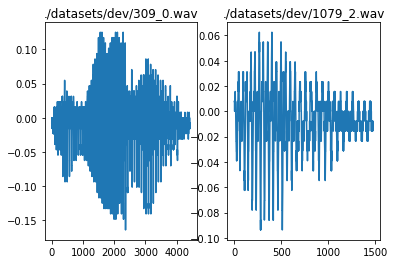

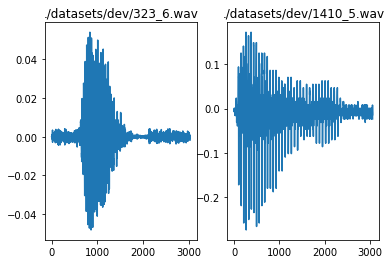

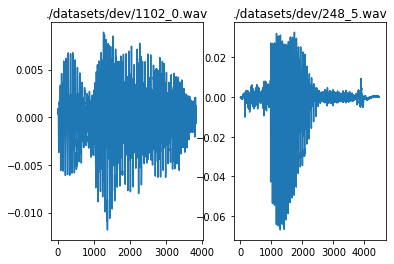

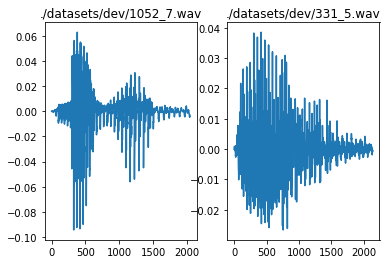

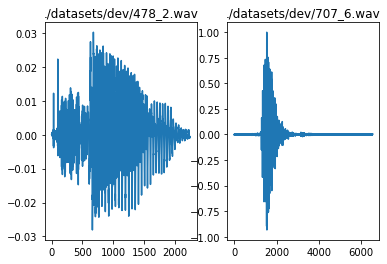

In [89]:
NUMBER_OF_SAMPLES = 10
NUMBER_OF_COLUMNS = 2
NUMBER_OF_ROWS = 1

j=1
for i in range(NUMBER_OF_SAMPLES):
    rand_file = PATH_TO_FILES + random.choice(files)
    signal, rate = librosa.load(rand_file, sr=None)
    
    if j > NUMBER_OF_COLUMNS * NUMBER_OF_ROWS:
        plt.show()
        j = 1
    
    plt.subplot(NUMBER_OF_ROWS, NUMBER_OF_COLUMNS, j)
    plt.title(rand_file)
    plt.plot(signal)
    
    j += 1

plt.show()

## 1.2 Trimming in time domain

We have different waves with a different number of samples and different amplitudes.  
Many of the files have an amplitude that tends to 0 at the beginning or at the end.

![Wave with silence at the beginning and at the end](./images/wave_silence_begin_end.svg)

In this case it would be a good idea to delete the silence both to reduce the noise (there will never be a total silence) and to reduce the features numbers by removing data without information.

![Wave with silence at the beginning and at the end and two lines to trim the non-silence part](./images/wave_silence_begin_end_trim.svg)

How do we choose the start and the end of the *non-silence*?  
We could set a fixed value (for instance in dB), but we could have people screaming and people whispering. What would happen if we removed some helpful piece of information? That's not a good idea.  
What about taking as *silence* every piece of our audio where the amplitude of the waveform is lower than a certain percentage of the max (or avg, or any other formula) value?

I think that the second option would be a better idea, but the precision drops when it is implemented. This may be because we could find pieces of information in the stress level of the final whispered part.

## 1.3 Amount of data for each label

How many samples do we have for each label? This could be useful in order to find the motivation to a "strange" number in the confusion matrix.

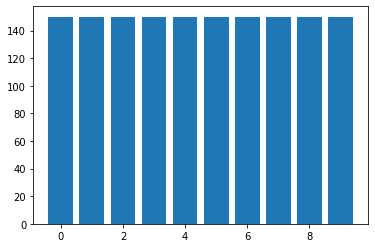

In [80]:
number_of_elements = np.zeros(10)

for file in files:
    label = int(file.split("_")[1].split('.')[0])
    number_of_elements[label] += 1

plt.bar(x=range(0,10), height=number_of_elements)
plt.show()

We have the same amount of training data for each label: no challenge here! 😩

## 1.4 Samples number

Let's start by analyzing the number of samples for our audio dataset.

Max value: 17567.0
Min value: 1148.0
Approximate range: 3196.69 +- 2053.35
95 percentile: 4982.10


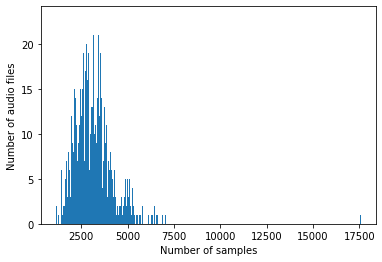

In [65]:
samples_number_values = np.empty(len(files))

for i, file in enumerate(files):
    signal, rate = librosa.load(PATH_TO_FILES + file, sr=None)
    
    samples_number_values[i] = len(signal)

print(f"Max value: {np.max(samples_number_values)}")
print(f"Min value: {np.min(samples_number_values)}")
print(f"Approximate range: {np.mean(samples_number_values):.2f} +- {np.std(samples_number_values)*2:.2f}")
print(f"95 percentile: {np.percentile(samples_number_values, 95):.2f}")

plt.hist(samples_number_values, bins=int(.5*len(files)))
plt.xlabel("Number of samples")
plt.ylabel("Number of audio files")
plt.show()

Since the 95% of the data has a number of samples between 1148 and 4983, we can take **5000** as the maximum number of samples.

If a file contains more than $5000$ samples, we will take just the first $5000$.  
If a file contains less than $5000$ samples, we will fill the remaining $5000-n$ samples with zeros.